In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py 
import GCRCatalogs

In [13]:
cosmo = GCRCatalogs.load_catalog("cosmoDC2_v1.1.4_image")

In [3]:
cosmo.get_quantity_info('morphology/spheroidHalfLightRadius')

{'units': 'physical kpc'}

In [3]:
# load the catalog as it exists after running Create_scotch.py
f    = h5py.File("/global/cscratch1/sd/mlokken/sn_hostenv/scotch_zlim.hdf5", "a")

In [4]:
f.keys()

<KeysViewHDF5 ['HostTable', 'TransientTable']>

In [14]:
# now add the disk and bulge half-light radii
# the 'get_quantities' line can be modified to add in any other quantity of interest from cosmoDC2
htable = f['HostTable']
for cl in htable.keys():
    if cl not in ['AGN', 'KN']:
        print(cl)
        clas = htable[cl]
        print(clas)
        dc2id = pd.DataFrame({'dc2ID':np.array(clas['dc2ID'])})
        print(dc2id.head)
        filters=[(lambda x: np.isin(x, dc2id), 'galaxy_id')]
        dc2 = cosmo.get_quantities(['morphology/diskHalfLightRadius', 'morphology/spheroidHalfLightRadius', 'galaxy_id'], filters=filters)
        dc2 = pd.DataFrame(dc2)
        mrged = pd.merge(dc2id, dc2, how='left', left_on='dc2ID', right_on='galaxy_id')
        print(mrged.head)
        clas.create_dataset('R_d', data=mrged['morphology/diskHalfLightRadius'])
        clas.create_dataset('R_s', data=mrged['morphology/spheroidHalfLightRadius'])

SLSN-I
<HDF5 group "/HostTable/SLSN-I" (30 members)>
<bound method NDFrame.head of              dc2ID
0       8937878321
1      10375442957
2      10313274590
3       8000447679
4       9813153682
...            ...
99995   5938505108
99996   8750874450
99997  10437612257
99998   6812875986
99999   8938822642

[100000 rows x 1 columns]>
<bound method NDFrame.head of              dc2ID  morphology/spheroidHalfLightRadius    galaxy_id  \
0       8937878321                            0.677579   8937878321   
1      10375442957                            1.430285  10375442957   
2      10313274590                            1.226303  10313274590   
3       8000447679                            0.585037   8000447679   
4       9813153682                            0.695607   9813153682   
...            ...                                 ...          ...   
99995   5938505108                            1.467143   5938505108   
99996   8750874450                            1.658003   875087

In [7]:
sum=0
for cl in htable.keys():
    print(len(np.array(htable[cl]['R_s'])))
    sum+= len(np.array(htable[cl]['R_s']))

100000
100000
100000
1999000
100000
2200000
100000
200000
101000


In [8]:
np.sum(np.isnan(np.array(htable['KN']['R_d'])[:100]))

0

In [9]:
sum

5000000

(0.0, 10.0)

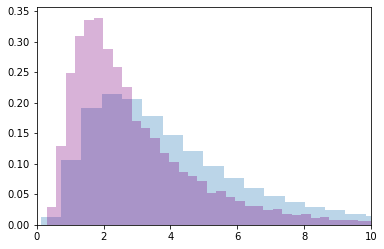

In [10]:

plt.hist(np.array(htable['SNII']['R_d']), density=True, bins=100, alpha=.3)
plt.hist(np.array(htable['SLSN-I']['R_d']), density=True, color='purple', bins=100, alpha=.3)
plt.xlim([0,10])

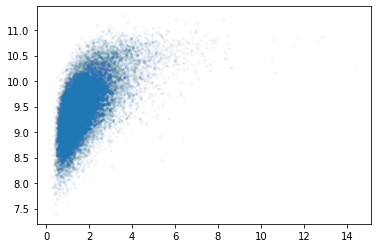

In [11]:
plt.scatter(np.array(htable['KN']['R_s']), np.array(htable['KN']['logMstar']), s=4, alpha=.01)

In [12]:
f.close()